In [12]:
import os, sys, importlib
%load_ext autoreload
%matplotlib inline
%autoreload 2

sys.path.append('/content/drive/My Drive/Research/qutip_sim/custom_files')
sys.path.append('/content/drive/My Drive/Research/qutip_sim/site-packages')
sys.path.append('/content/drive/My Drive/Research/qutip_sim/site-packages/qutip')

from qutip import *
!pip install scikit-optimize
from analysis_tools import *
from sim_functions import *
from experiment_sim import *

import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

label = ["II", "IX", "IY", "IZ", "XI", "XX", "XY", "XZ", "YI", "YX", "YY", "YZ", "ZI", "ZX", "ZY", "ZZ"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
inf_factor = 1

noise = 1.0
freq = [7083, 6779]
detunings = [0.272, 0.272]
anharms = np.array([-279.8, -286.8]) 
T1 = [7.06*inf_factor,7.63*inf_factor]
T2 = [7.46*inf_factor,10.25*inf_factor]
# J = 30 
zeta = - 4.4 

total_duration = 0.6
points = 5
initial = ['+', '+'] # ['-i', '1'] #['-i', '1']

amps = [1.00, 1.00, 1.00] # [0.169 / 0.167, 0.589 / 0.572, 1.1]
phis = [0.0, 0.0, 0.0]
drags = [1.0, 1,0, 1.0]

x = []
y = []
for i in range(points):
    if (i+1) % 1 == 0:
      print(i+1)
    echo_timing = total_duration / points * (i + 1)
    delays = [echo_timing, total_duration - echo_timing]
    # test1 = vqe(freq, detunings, anharms, T1, T2, zeta, files=None, echo='single', initial=initial, Hamiltonian='dipole', quick=False)
    test1 = vqe(freqs=freq, detunings=detunings, anharms=anharms, T1s=T1, T2s=T2, J=zeta, files=None, echo='single', Hamiltonian='dispersive')
    # delays = [echo_timing]
    # test1 = ham_tomo(freq, detunings, anharms, T1, T2, zeta, files=None, echo=None, initial=initial, Hamiltonian='dipole', quick=True) # [[4, 'Z Z'], [30, 'X X']]) # 
    test1.run_test(delays=delays, amps=amps, phis=phis, drags=drags, widths=[0.010, 0.010], truncs=[3.0, 3.0])
    x.append(echo_timing)
    y.append(test1.result)#
    test1.plot(full_trace=True, sequence=False, pauli=False, tomography=False, bloch=False, corr=False, error=False, save=None)

result = np.transpose(np.array(y), (1,0,2))

plot_4_4(x, result, fit_y=None, label=label, name='Other qubit in ground state')

1


TypeError: ignored

In [ ]:
inf_factor = 1

noise = 1.0
freq = [7083, 6779]
detunings = [0.272, 0.272]
anharms = np.array([-279.8, -286.8]) 
T1 = [7.06*inf_factor,7.63*inf_factor]
T2 = [7.46*inf_factor,10.25*inf_factor]
# J = 30 
zeta = - 4.4 

total_duration = 0.25
points = 50
initial = ['+', '+'] # ['-i', '1'] #['-i', '1']

amps = [0.50, 1.00, 1.00] # [0.169 / 0.167, 0.589 / 0.572, 1.1]
phis = [0.0, 0.0, 0.0]
drags = [1.0, 1,0, 1.0]

x = []
y = []
for i in range(points):
    if (i+1) % 25 == 0:
      print(i+1)
    echo_timing = total_duration / points * (i + 1)
    # delays = [echo_timing, total_duration - echo_timing]
    # test1 = vqe(freq, anharms, T1, T2, J, files=None, echo='single', initial=['0', '0'], Hamiltonian='dispersive')
    delays = [echo_timing]
    test1 = ham_tomo(freq, detunings, anharms, T1, T2, zeta, files=None, echo='single', initial=initial, Hamiltonian='dipole', quick=False) # [[4, 'Z Z'], [30, 'X X']]) # 
    test1.run_test(delays=delays, amps=amps, phis=phis, drags=drags, widths=[0.010, 0.010], truncs=[3.0, 3.0])
    x.append(echo_timing)
    y.append(test1.result)#
    test1.plot(full_trace=True, sequence=False, pauli=False, tomography=False, bloch=False, corr=False, error=False, save=None)

result = np.transpose(np.array(y), (1,0,2))

plot_4_4(x, result, fit_y=None, label=label, name='Other qubit in ground state')


Output hidden; open in https://colab.research.google.com to view.

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


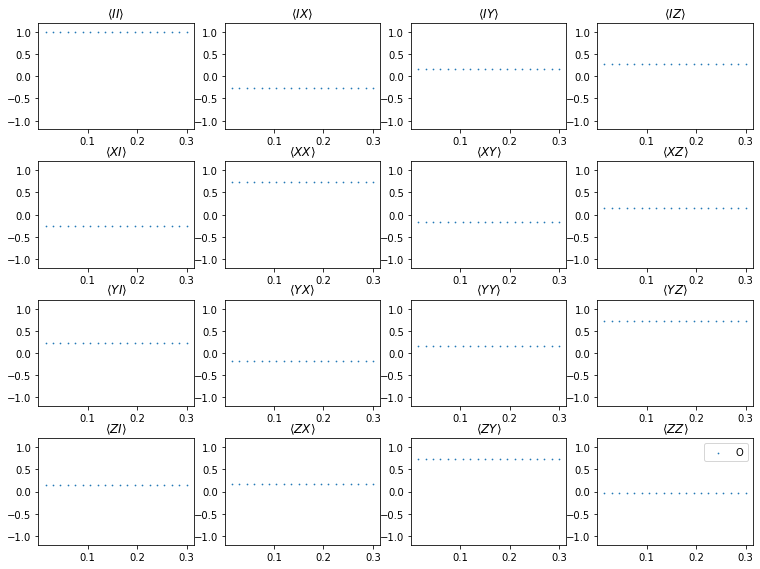

In [ ]:
inf_factor = 1

noise = 1.0
freq = [7083, 6779]
detunings = [0.272, 0.272]
anharms = np.array([-279.8, -286.8]) 
T1 = [7.06*inf_factor,7.63*inf_factor]
T2 = [7.46*inf_factor,10.25*inf_factor]
# J = 30 
zeta = - 4.4

total_duration = 0.3
points = 20
initial = ['+', '+'] # ['-i', '1'] #['-i', '1']

amps = [1.0, 1.00, 1.00] # [0.169 / 0.167, 0.589 / 0.572, 1.1]
phis = [0.0, 0.0, 0.0]
drags = [1.0, 1,0, 1.0]

x = []
y = []
for i in range(points):
    # if (i+1) % 25 == 0:
    #   
    print(i+1)
    echo_timing = total_duration / points * (i + 1)
    delays = [echo_timing, total_duration - echo_timing]
    test1 = vqe(freq, detunings, anharms, T1, T2, zeta, files=None, echo='single', initial=initial, Hamiltonian='dipole', quick=True) # [[4, 'Z Z'], [30, 'X X']]) # 
    test1.run_test(delays=delays, amps=amps, phis=phis, drags=drags, widths=[0.06, 0.06], truncs=[20/6, 20/6])
    x.append(echo_timing)
    y.append(test1.result)#
    test1.plot(full_trace=True, sequence=False, pauli=False, tomography=False, bloch=False, corr=False, error=False, save=None)

result_dipole = np.transpose(np.array(y), (1,0,2))

plot_4_4(x, result_dipole, fit_y=None, label=label, name='Other qubit in excited state')
